In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


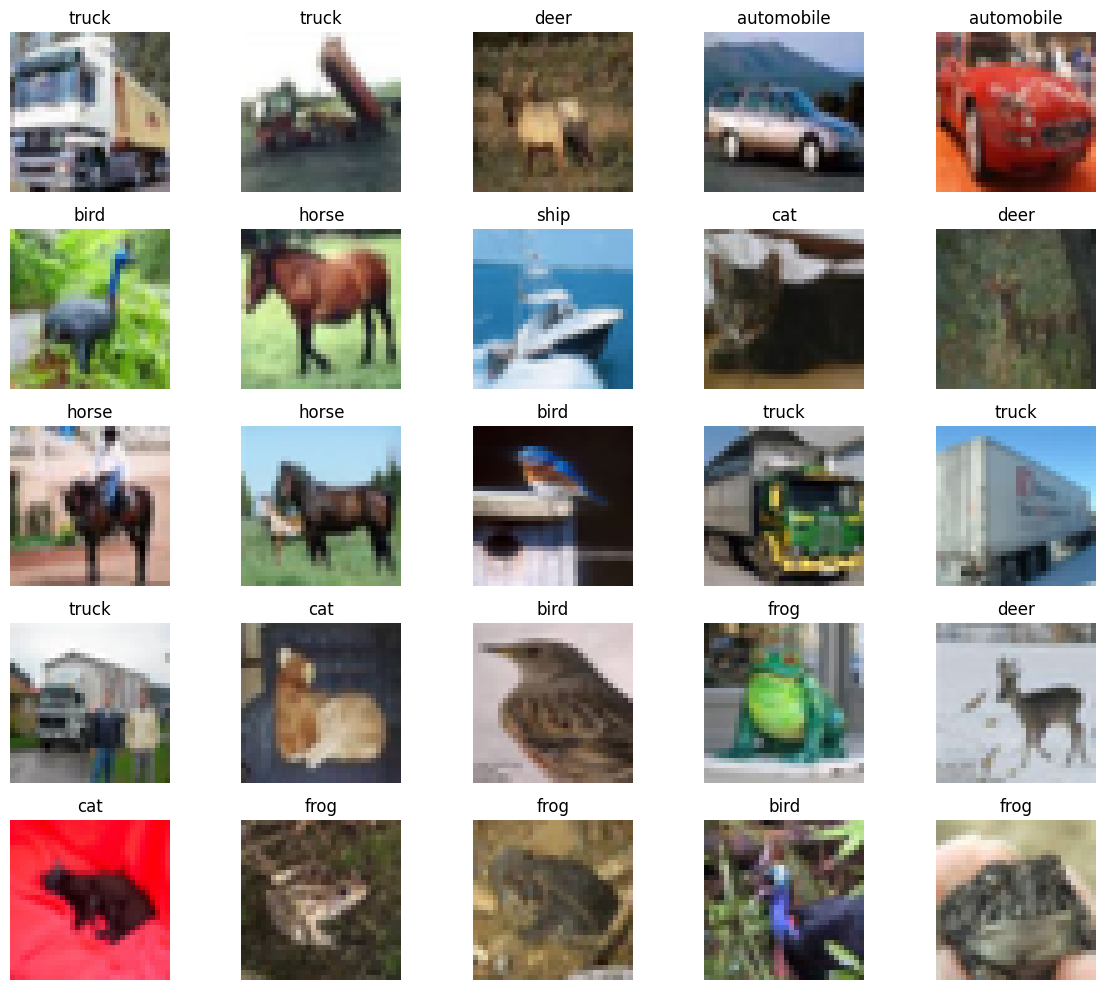

In [5]:
visualize_images(sample,(5,5))

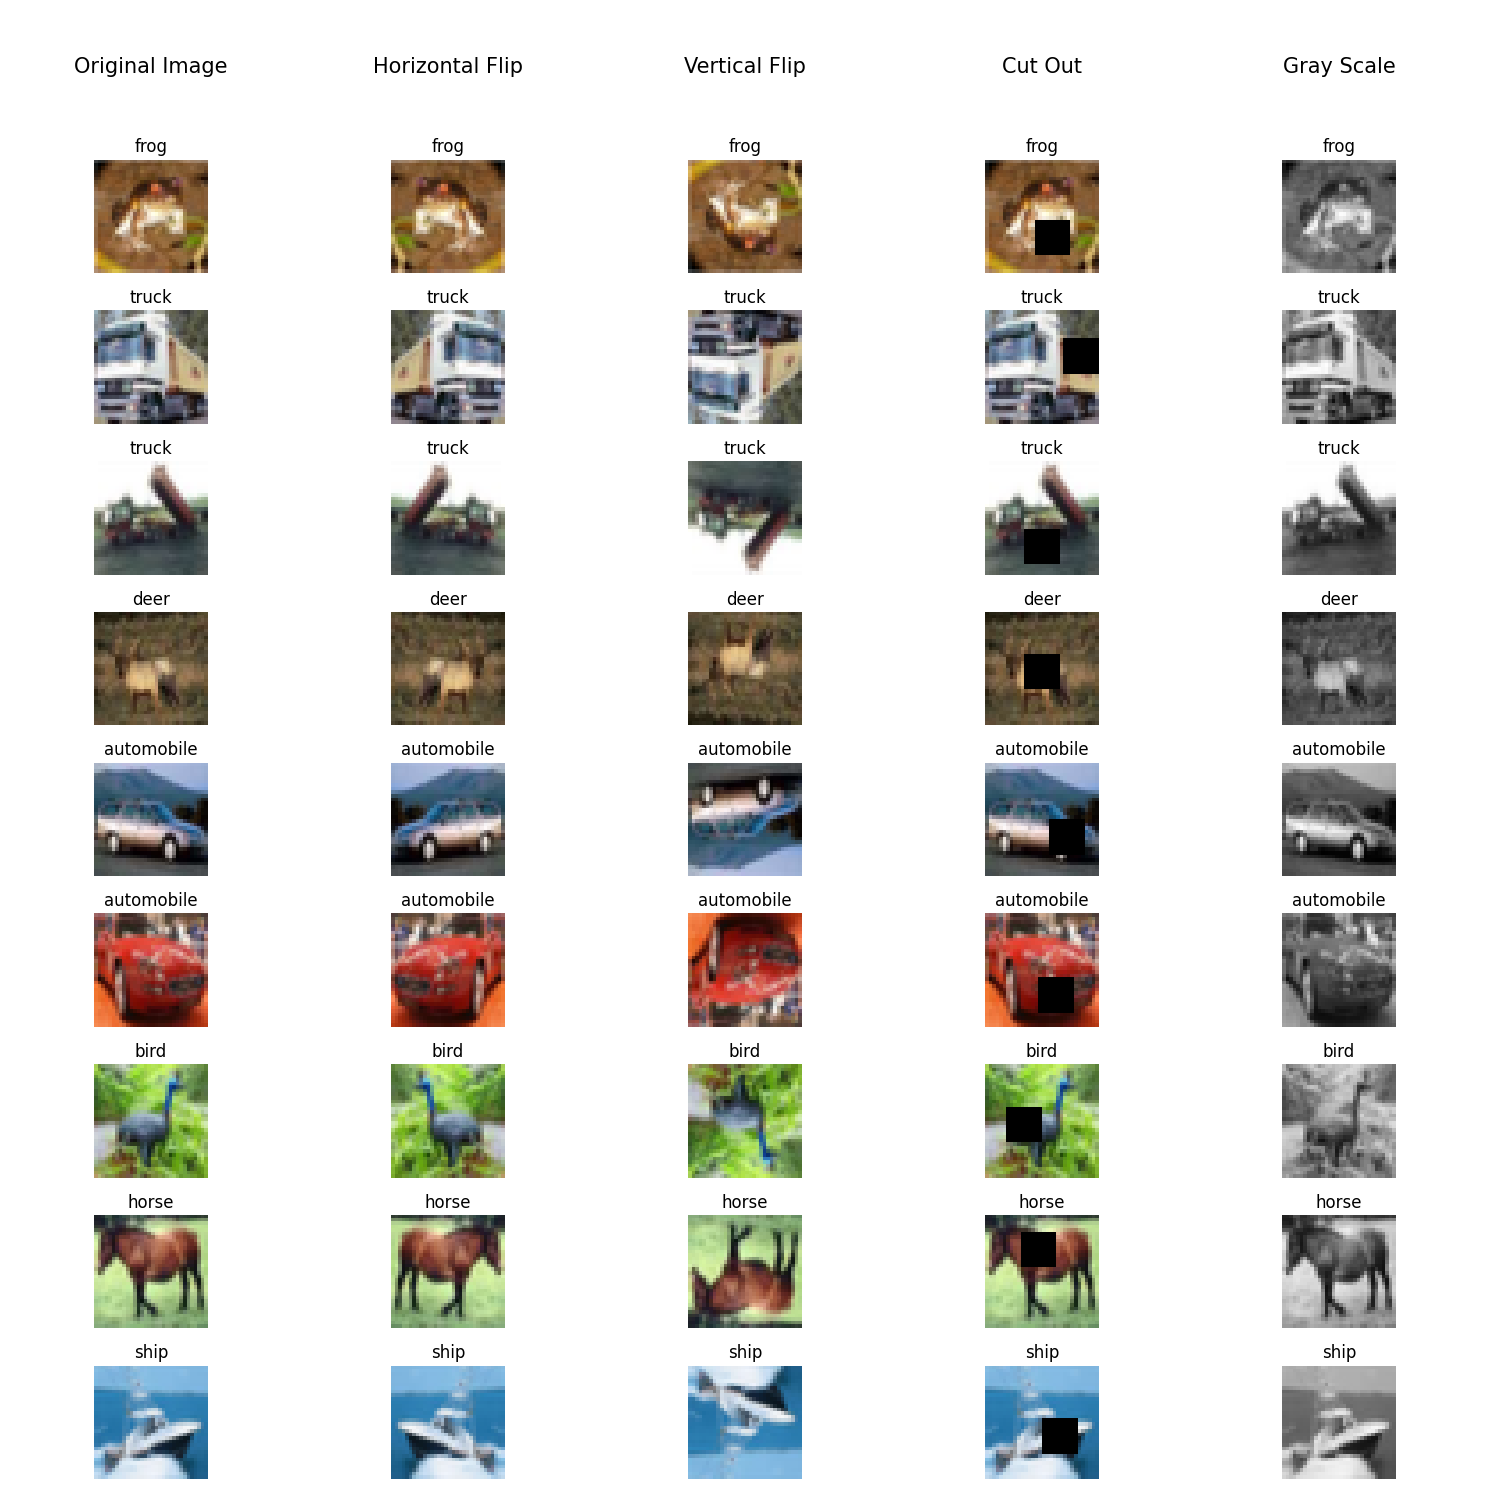

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="bn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
       BatchNorm2d-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
       BatchNorm2d-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
      BatchNorm2d-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 18,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.8768 Batch_id=1562 Accuracy=30.95: 100%|██████████| 1563/1563 [00:29<00:00, 53.80it/s]


Test set: Average loss: 1.4580, Accuracy: 4708/10000 (47.08%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.3114 Batch_id=1562 Accuracy=42.23: 100%|██████████| 1563/1563 [00:29<00:00, 53.68it/s]


Test set: Average loss: 1.2631, Accuracy: 5489/10000 (54.89%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.3132 Batch_id=1562 Accuracy=46.65: 100%|██████████| 1563/1563 [00:28<00:00, 53.90it/s]


Test set: Average loss: 1.2059, Accuracy: 5666/10000 (56.66%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.3826 Batch_id=1562 Accuracy=49.22: 100%|██████████| 1563/1563 [00:29<00:00, 53.60it/s]


Test set: Average loss: 1.1082, Accuracy: 6073/10000 (60.73%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.8248 Batch_id=1562 Accuracy=51.32: 100%|██████████| 1563/1563 [00:28<00:00, 54.42it/s]


Test set: Average loss: 1.0452, Accuracy: 6257/10000 (62.57%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.5753 Batch_id=1562 Accuracy=52.44: 100%|██████████| 1563/1563 [00:28<00:00, 54.41it/s]


Test set: Average loss: 0.9999, Accuracy: 6448/10000 (64.48%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.5586 Batch_id=1562 Accuracy=54.05: 100%|██████████| 1563/1563 [00:28<00:00, 54.41it/s]


Test set: Average loss: 0.9824, Accuracy: 6532/10000 (65.32%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.2567 Batch_id=1562 Accuracy=54.88: 100%|██████████| 1563/1563 [00:28<00:00, 54.32it/s]


Test set: Average loss: 0.9508, Accuracy: 6624/10000 (66.24%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=1.4119 Batch_id=1562 Accuracy=55.60: 100%|██████████| 1563/1563 [00:28<00:00, 54.16it/s]


Test set: Average loss: 0.9367, Accuracy: 6687/10000 (66.87%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.3076 Batch_id=1562 Accuracy=56.66: 100%|██████████| 1563/1563 [00:28<00:00, 55.31it/s]


Test set: Average loss: 0.9134, Accuracy: 6787/10000 (67.87%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=1.8485 Batch_id=1562 Accuracy=57.15: 100%|██████████| 1563/1563 [00:28<00:00, 54.48it/s]


Test set: Average loss: 0.8959, Accuracy: 6932/10000 (69.32%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=1.0527 Batch_id=1562 Accuracy=57.95: 100%|██████████| 1563/1563 [00:27<00:00, 56.18it/s]


Test set: Average loss: 0.8691, Accuracy: 6971/10000 (69.71%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=1.1393 Batch_id=1562 Accuracy=58.65: 100%|██████████| 1563/1563 [00:28<00:00, 55.01it/s]


Test set: Average loss: 0.8777, Accuracy: 6921/10000 (69.21%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=1.4384 Batch_id=1562 Accuracy=59.05: 100%|██████████| 1563/1563 [00:27<00:00, 55.93it/s]


Test set: Average loss: 0.8583, Accuracy: 7036/10000 (70.36%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=1.2128 Batch_id=1562 Accuracy=59.26: 100%|██████████| 1563/1563 [00:28<00:00, 54.86it/s]


Test set: Average loss: 0.8387, Accuracy: 7099/10000 (70.99%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=1.1926 Batch_id=1562 Accuracy=59.33: 100%|██████████| 1563/1563 [00:28<00:00, 55.71it/s]


Test set: Average loss: 0.8105, Accuracy: 7181/10000 (71.81%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=1.2552 Batch_id=1562 Accuracy=60.01: 100%|██████████| 1563/1563 [00:27<00:00, 56.06it/s]


Test set: Average loss: 0.8209, Accuracy: 7152/10000 (71.52%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.2170 Batch_id=1562 Accuracy=60.16: 100%|██████████| 1563/1563 [00:28<00:00, 54.93it/s]


Test set: Average loss: 0.8085, Accuracy: 7183/10000 (71.83%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=1.4026 Batch_id=1562 Accuracy=60.34: 100%|██████████| 1563/1563 [00:28<00:00, 55.24it/s]


Test set: Average loss: 0.7859, Accuracy: 7273/10000 (72.73%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.3541 Batch_id=1562 Accuracy=60.94: 100%|██████████| 1563/1563 [00:28<00:00, 55.64it/s]


Test set: Average loss: 0.8052, Accuracy: 7191/10000 (71.91%)

Adjusting learning rate of group 0 to 6.0016e-04.


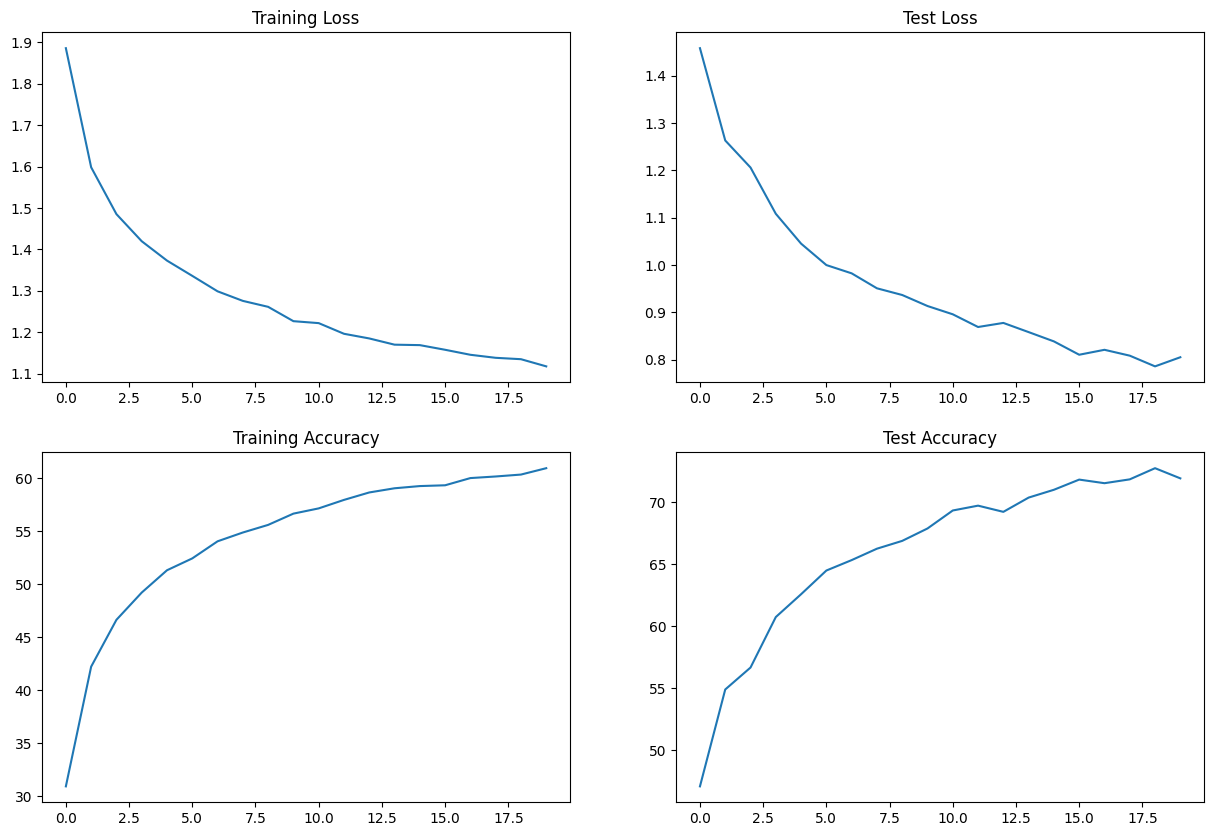

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

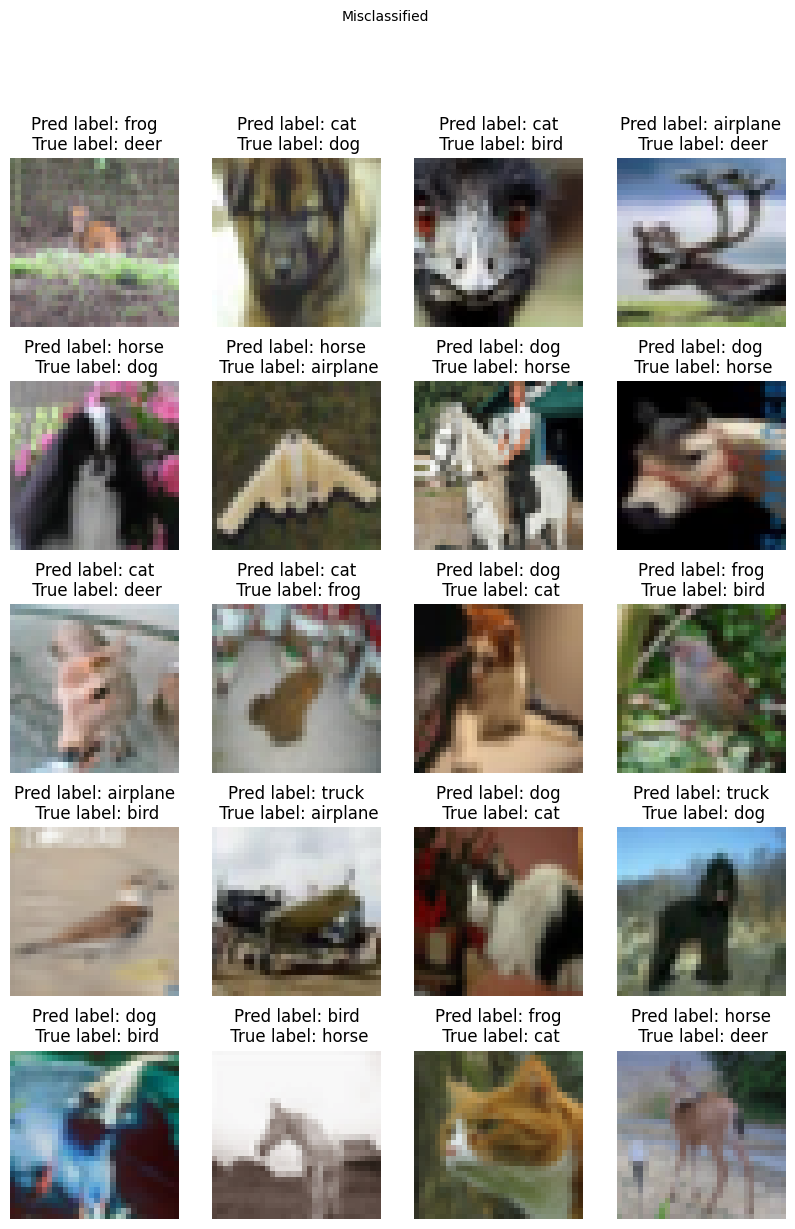

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 71 %

Accuracy of automobile : 93 %

Accuracy of  bird : 48 %

Accuracy of   cat : 51 %

Accuracy of  deer : 68 %

Accuracy of   dog : 61 %

Accuracy of  frog : 85 %

Accuracy of horse : 79 %

Accuracy of  ship : 79 %

Accuracy of truck : 80 %
{'airplane': 71.8543046357616, 'automobile': 93.31103678929766, 'bird': 48.214285714285715, 'cat': 51.298701298701296, 'deer': 68.22429906542057, 'dog': 61.980830670926515, 'frog': 85.19736842105263, 'horse': 79.16666666666667, 'ship': 79.04761904761905, 'truck': 80.625}


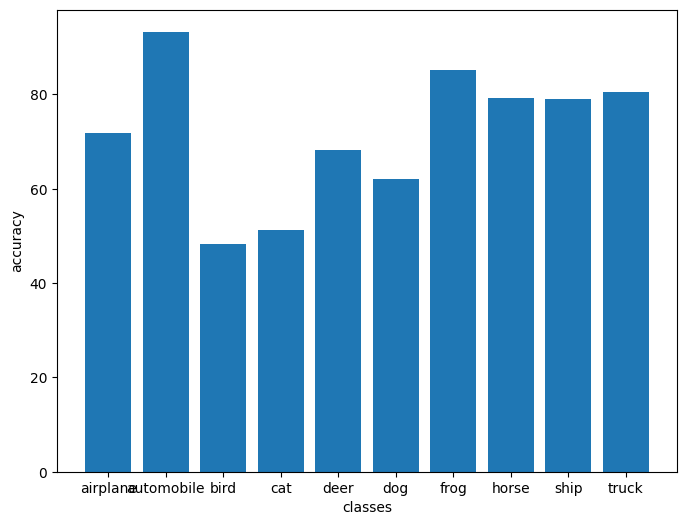

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)